<a href="https://colab.research.google.com/github/Rogerio-mack/CDA_2021_2S/blob/main/HCluster_Exemplo_em_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages('cluster')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('fpc')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘modeltools’, ‘DEoptimR’, ‘mclust’, ‘flexmix’, ‘prabclus’, ‘diptest’, ‘robustbase’, ‘kernlab’




In [ ]:
library('cluster')
library('fpc')

# Dados

In [ ]:
my_data = USArrests
head(my_data)

,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


In [ ]:
nrow(my_data)

[1] 50

# Preparação dos dados

In [ ]:
my_data = na.omit(my_data)
my_data = data.frame(scale(USArrests))
head(my_data)

,Murder,Assault,UrbanPop,Rape
,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,1.24256408,0.7828393,-0.5209066,-0.003416473
Alaska,0.50786248,1.1068225,-1.2117642,2.484202941
Arizona,0.07163341,1.4788032,0.9989801,1.042878388
Arkansas,0.23234938,0.2308680,-1.0735927,-0.184916602
California,0.27826823,1.2628144,1.7589234,2.067820292
Colorado,0.02571456,0.3988593,0.8608085,1.864967207


# 1. Matriz de Distâncias

In [ ]:
d = dist(as.matrix(my_data),method = 'euclidean') 

In [ ]:
d

                 Alabama    Alaska   Arizona  Arkansas California  Colorado
Alaska         2.7037541                                                   
Arizona        2.2935197 2.7006429                                         
Arkansas       1.2898102 2.8260386 2.7177583                               
California     3.2631104 3.0125415 1.3104842 3.7636409                     
Colorado       2.6510673 2.3265187 1.3650307 2.8310512  1.2876185          
Connecticut    3.2152975 4.7399125 3.2628575 2.6076395  4.0663898 3.3279920
Delaware       2.0192927 3.6213633 1.9093696 1.8003239  3.0737852 2.5547456
Florida        2.2981353 2.9967642 1.7493928 3.3721968  2.0250039 2.4458600
Georgia        1.1314351 2.8194388 2.7871963 2.2117614  3.3780585 2.8649105
Hawaii         3.3885300 4.5301340 3.2621208 2.9723097  3.6589083 2.8233524
Idaho          2.9146623 4.0580555 3.5210071 1.7687255  4.4879436 3.4767685
Illinois       1.8734993 3.2670626 1.0825512 2.4626424  1.9117469 1.7898322
Indiana     

# 2. Dendograma

In [ ]:
fit = hclust(d, method = "complete")                   
# fit = hclust(d, method = "single") 
# fit = hclust(d, method = "average")

In [ ]:
print(fit)


Call:
hclust(d = d, method = "complete")

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 50 



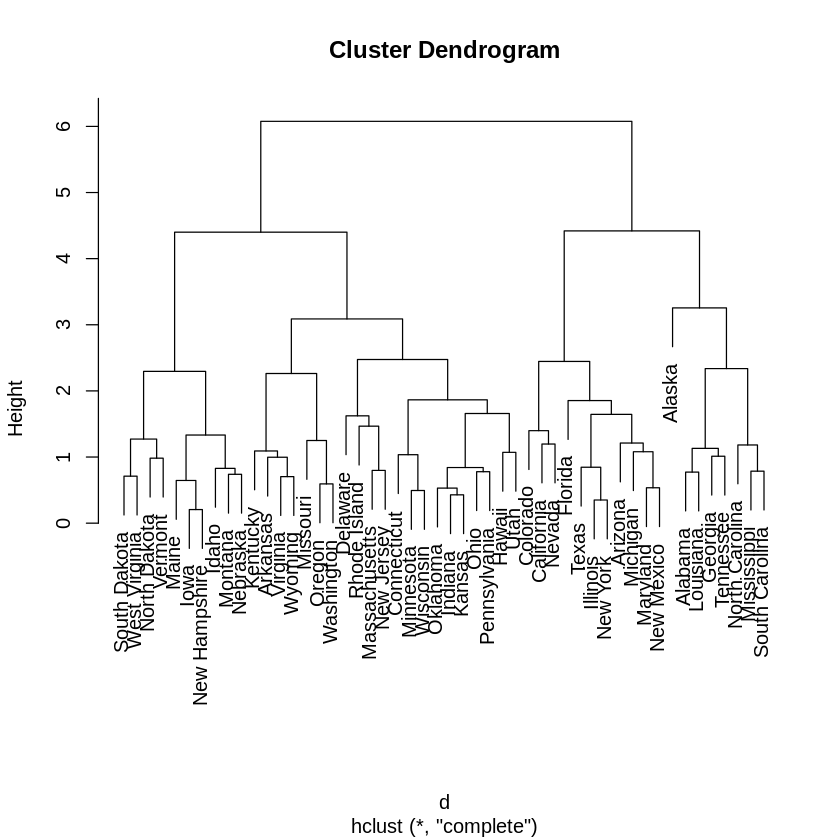

In [ ]:
par(mfrow=c(1, 1))
plot(fit)


# 3. Clusters

In [ ]:
groups = cutree(fit, k=3)
groups

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              2              3              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              3              2              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              2              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              2 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             3              2              3              1              3 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              2              3              3 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             2              2              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             3              3              3              3              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              1              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             3              3              3              3              3

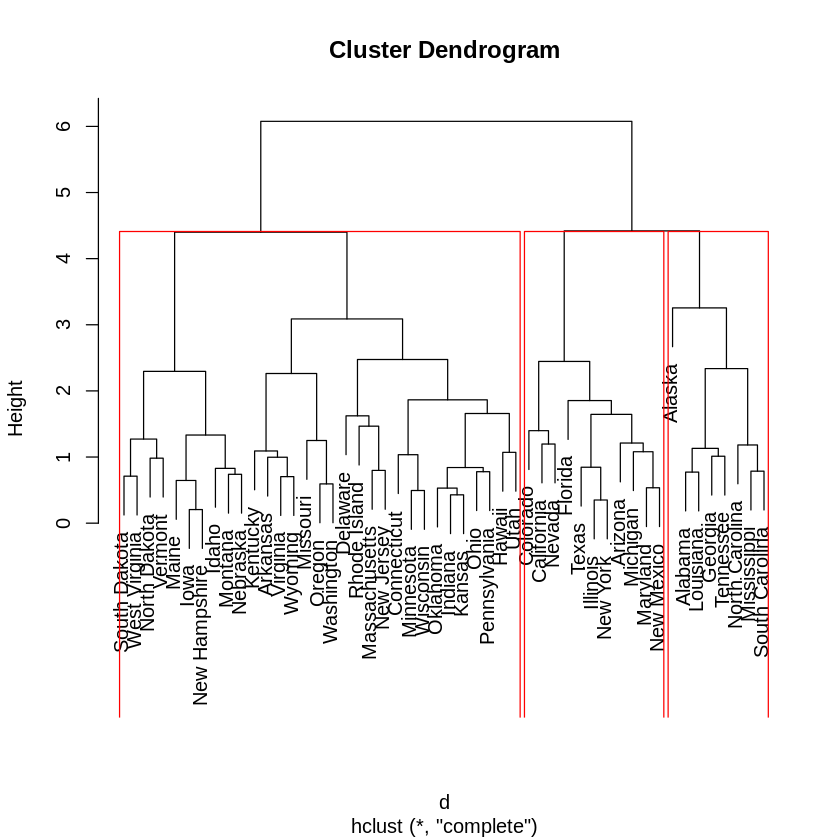

In [ ]:
par(mfrow=c(1, 1))
plot(fit)
rect.hclust(fit, k = 3, border = 'red')

# Explorando os Clusters

In [ ]:
my_data = cbind(my_data,as.numeric(groups))
colnames(my_data)[5] = 'cluster'
print(my_data[my_data$cluster == 2,]) 

               Murder   Assault  UrbanPop      Rape cluster as.numeric(groups)
Arizona    0.07163341 1.4788032 0.9989801 1.0428784       2                  2
California 0.27826823 1.2628144 1.7589234 2.0678203       2                  2
Colorado   0.02571456 0.3988593 0.8608085 1.8649672       2                  2
Florida    1.74767144 1.9707777 0.9989801 1.1389667       2                  2
Illinois   0.59970018 0.9388312 1.2062373 0.2955249       2                  2
Maryland   0.80633501 1.5507995 0.1008652 0.7012311       2                  2
Michigan   0.99001041 1.0108275 0.5844655 1.4806140       2                  2
Nevada     1.01296983 0.9748294 1.0680658 2.6443501       2                  2
New Mexico 0.82929443 1.3708088 0.3081225 1.1603196       2                  2
New York   0.76041616 0.9988281 1.4134946 0.5197310       2                  2
Texas      1.12776696 0.3628612 0.9989801 0.4556721       2                  2
           as.numeric(groups)
Arizona               

In [ ]:
table(my_data$cluster)


 1  2  3 
 8 11 31 

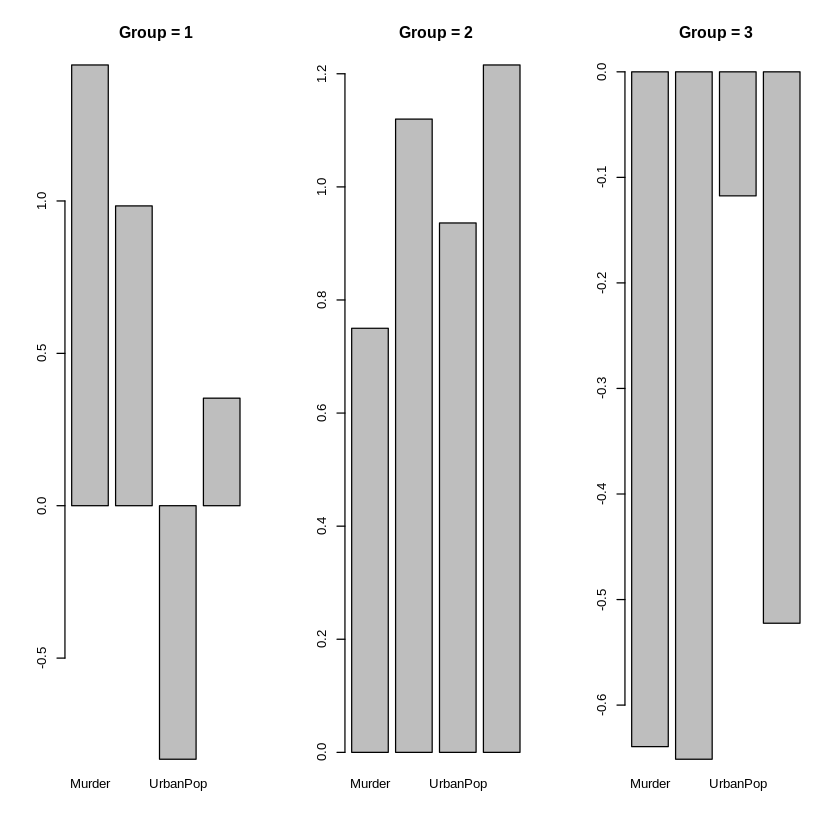

In [ ]:
par(mfrow=c(1, 3))
for (i in 1:3){
  main_ = paste("Group =", i)
  barplot(sapply(my_data[my_data$cluster==i,c(1:4)],mean),main=main_) 
}

# Silhouette

In [ ]:
set.seed(1984) 

for (i in 2:10){
  d = dist(as.matrix(my_data),method = 'euclidean')
  fit = hclust(d, method = "complete")                   
  groups = cutree(fit, k=i) 
  ss = silhouette(groups, d)
  # plot(ss)
  cat('Média de Silhouette para ', i , ' clusters = ', mean(ss[,3]) , '\n')
} 

Média de Silhouette para  2  clusters =  0.5130001 
Média de Silhouette para  3  clusters =  0.4932419 
Média de Silhouette para  4  clusters =  0.3778231 
Média de Silhouette para  5  clusters =  0.3730169 
Média de Silhouette para  6  clusters =  0.3147493 
Média de Silhouette para  7  clusters =  0.3024482 
Média de Silhouette para  8  clusters =  0.2671512 
Média de Silhouette para  9  clusters =  0.2516229 
Média de Silhouette para  10  clusters =  0.2161163 
